In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data_path='data/'

In [7]:
botnet = pd.read_csv(data_path + 'july/week5/botnet_flows_cut.csv', header=None)

In [8]:
botnet

0       1                2               3      4   \
0       2016-07-28 01:00:21   0.233   31.192.109.167   42.219.152.18     80   
1       2016-07-28 01:00:21   0.233    42.219.152.18  31.192.109.167   1533   
2       2016-07-28 01:01:26  45.365    42.219.152.18  173.192.170.88   1567   
3       2016-07-28 01:01:26  45.365   173.192.170.88   42.219.152.18     80   
4       2016-07-28 01:01:00   0.291   61.177.120.254   42.219.152.18   6667   
...                     ...     ...              ...             ...    ...   
607031  2016-07-31 07:58:50   0.000      64.2.44.237   42.219.154.71  36896   
607032  2016-07-31 07:58:56   3.004  213.236.124.149   42.219.156.27  38271   
607033  2016-07-31 07:59:18   9.000   212.195.85.116   42.219.156.31  46393   
607034  2016-07-31 07:59:37   9.020     71.136.68.67   42.219.158.17  42724   
607035  2016-07-31 07:59:57   0.000  200.138.252.146   42.219.158.17  49949   

           5    6       7   8   9   10    11           12  
0        1533  TCP  .AP.SF   0   0   5   420  nerisbotnet  
1          80  TCP  .AP.SF   0   0  10   910  nerisbotnet  
2          80  TCP  .AP.S.   0   0  18  2642  nerisbotnet  
3        1567  TCP  .A.RS.   0   0   4   190  nerisbotnet  
4        1586  TCP  .A..S.   0   0   1    48  nerisbotnet  
...       ...  ...     ...  ..  ..  ..   ...          ...  
607031  53413  UDP  .A....   0   0   1   151  nerisbotnet  
607032     23  TCP  ....S.   0   0   2   120  nerisbotnet  
607033     23  TCP  ....S.   0   0   3   180  nerisbotnet  
607034     23  TCP  ....S.   0   0   3   156  nerisbotnet  
607035  53413  UDP  .A....   0   0   1   151  nerisbotnet  

[607036 rows x 13 columns]

In [9]:
# duration
fig, ax = plt.subplots(figsize=(15,7))
botnet[1].hist(bins=100, ax = ax)
plt.xlim(0,100)


(0.0, 100.0)

In [10]:
botnet[1].describe()

count    607036.000000
mean         11.486129
std          92.751579
min           0.000000
25%           0.000000
50%           0.000000
75%           8.945000
max        2691.891000
Name: 1, dtype: float64

(0.0, 100.0)

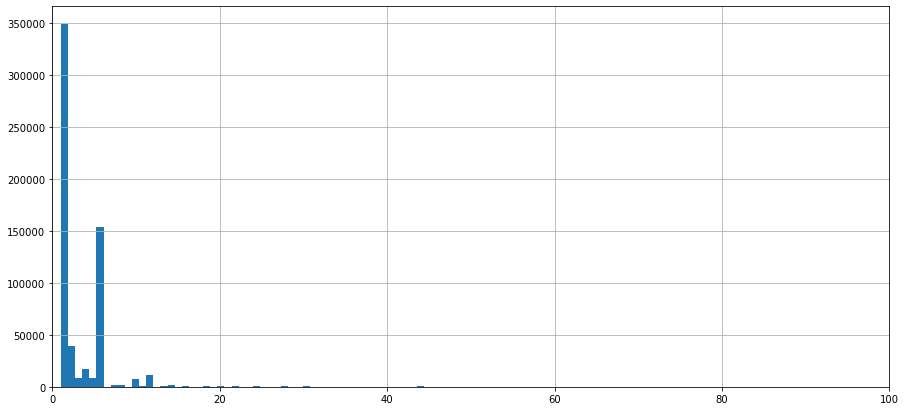

In [11]:
# paquetes
fig, ax = plt.subplots(figsize=(15,7))
botnet[10].hist(bins=300, ax = ax)
plt.xlim(0,100)

(0.0, 5000.0)

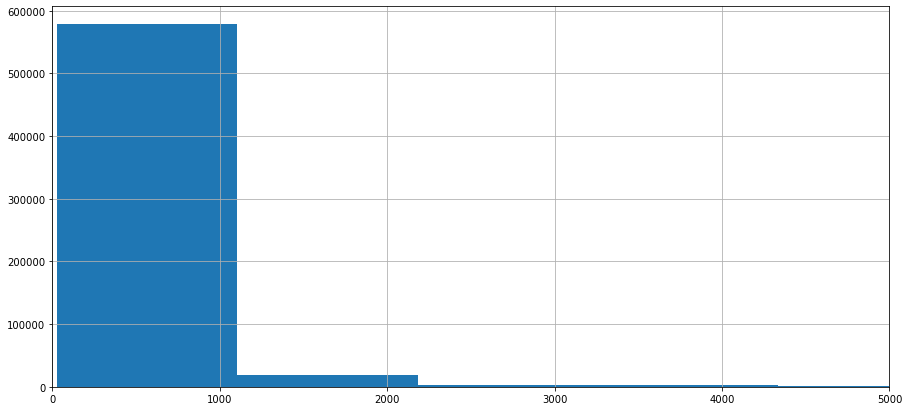

In [12]:
# bytes
fig, ax = plt.subplots(figsize=(15,7))
botnet[11].hist(bins=300, ax = ax)
plt.xlim(0,5000)

In [13]:
botnet[11].describe()

count    607036.000000
mean        510.599727
std        6662.274298
min          28.000000
25%          70.000000
50%          86.000000
75%         288.000000
max      322938.000000
Name: 11, dtype: float64

In [15]:
# From https://dmuhs.blog/2018/09/14/visualizing-ip-connections-in-python/
import networkx as nx
%matplotlib inline

In [100]:
G = nx.DiGraph()
connections = set()
nodes = set()
botnet_graph = botnet.iloc[:2000,:]

In [101]:
G.add_nodes_from(set(botnet_graph[2]))
G.add_nodes_from(set(botnet_graph[3]))

In [102]:
len(set(edges))

1136

In [103]:
# (src,dst)
#edges = [(botnet.iloc[i,2],botnet_graph.iloc[i,3]) for i in range(botnet_graph.shape[0])]
edges = list(zip(botnet_graph[2],botnet_graph[3]))
G.add_edges_from(set(edges))

In [104]:
len(set(edges))

1136

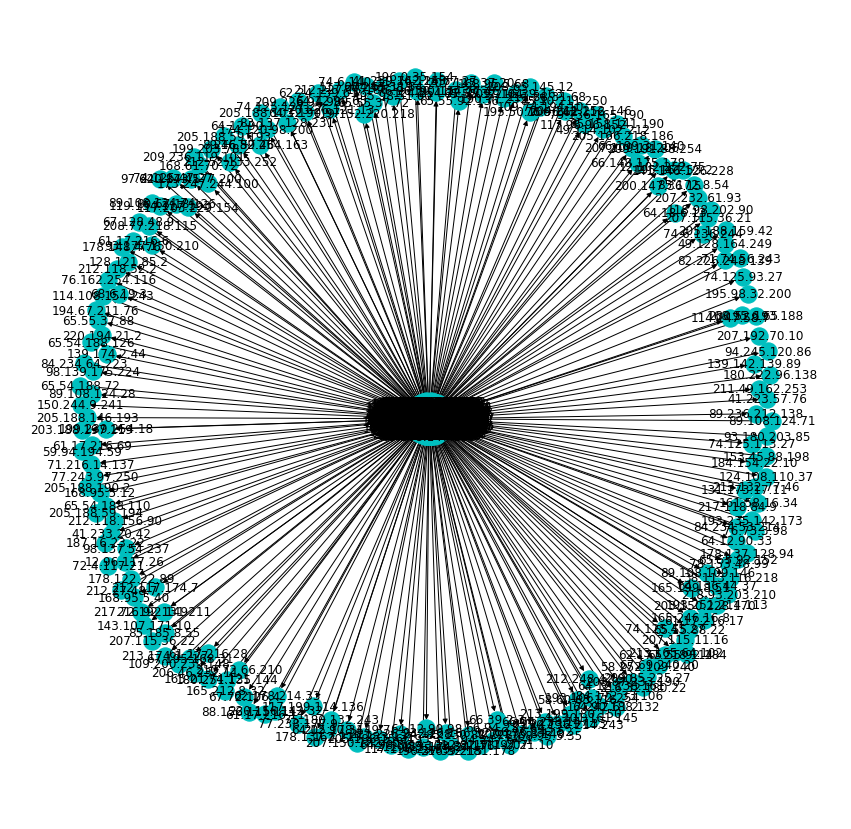

In [105]:
pos = nx.spring_layout(G, scale=1.0, iterations=100)
fig, ax = plt.subplots(figsize=(15,15))
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)

In [67]:
G.remove_node('77.243.97.250')
G.remove_node('85.172.8.54')
G.remove_node('212.248.42.90')
pos = nx.spring_layout(G, scale=1.0, iterations=100)
fig, ax = plt.subplots(figsize=(15,15))
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)